<a href="https://colab.research.google.com/github/erdcpatel/PythonDataScience/blob/master/0228_SigmoidNeuron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Plotting Sigmoid Function

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import matplotlib.colors
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from tqdm import tqdm_notebook

$S_{w, b}(x) = \frac{1}{1 + e^{-(wx + b)}}$

In [0]:
def sigmoid(x, w, b):
  return 1/(1 + np.exp(-(w*x + b)))

In [32]:
sigmoid(1, 0.5, 0)

0.6224593312018546

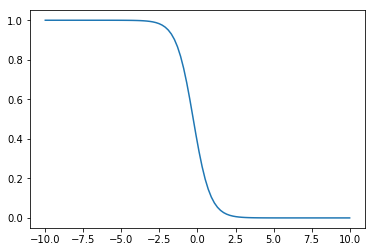

In [33]:
w = -1.8    #@param {type: "slider", min: -2, max: 2, step: 0.1}
b = -0.5  #@param {type: "slider", min: -2, max: 2, step: 0.1}
X = np.linspace(-10,10,100)
Y = sigmoid(X, w, b)

plt.plot(X, Y)
plt.show()


$S_{w_1, w_2, b}(x_1, x_2) = \frac{1}{1 + e^{-(w_1x_1 + w_2x_2 + b)}}$

In [0]:
def sigmoid_2d(x1, x2, w1, w2, b):
  return 1/(1 + np.exp(-(w1*x1 + w2*x2 + b)))

In [35]:
sigmoid_2d(1, 0, 0.5, 0, 0)

0.6224593312018546

In [36]:
X1 = np.linspace(-10, 10, 100)
X2 = np.linspace(-10, 10, 100)

XX1, XX2 = np.meshgrid(X1, X2)

print(X1.shape, X2.shape, XX1.shape, XX2.shape)

(100,) (100,) (100, 100) (100, 100)


In [0]:
w1 = 2
w2 = -0.5
b = 0
Y = sigmoid_2d(XX1, XX2, w1, w2, b)

In [0]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])

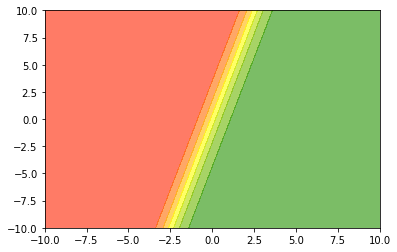

In [39]:
plt.contourf(XX1, XX2, Y, cmap = my_cmap, alpha = 0.6)
plt.show()

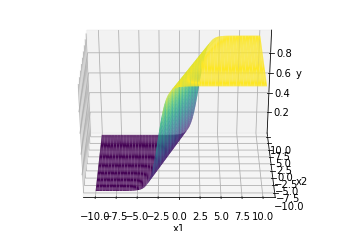

In [40]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(XX1, XX2, Y, cmap='viridis')
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')

ax.view_init(30, 270)


# Compute Loss for a Given Dataset

In [0]:
w_unknown = 0.5
b_unknown = 0.25

X = np.random.random(25) * 20 - 10
Y = sigmoid(X, w_unknown, b_unknown)

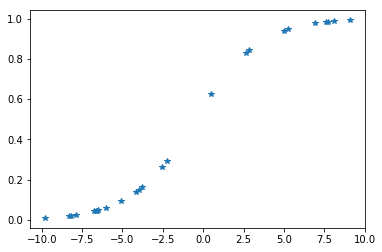

In [42]:
plt.plot(X, Y, '*')
plt.show()

In [0]:
def calculate_loss(X, Y, w_est, b_est):
  loss = 0
  for x, y in zip(X, Y):
    loss += (y - sigmoid(x, w_est, b_est))**2
  return loss

In [0]:
W = np.linspace(0, 2, 101)
B = np.linspace(-1, 1, 101)

WW, BB = np.meshgrid(W, B)

Loss = np.zeros(WW.shape)

In [45]:
WW.shape

(101, 101)

In [0]:
for i in range(WW.shape[0]):
  for j in range(WW.shape[1]):
    Loss[i, j] = calculate_loss(X, Y, WW[i, j], BB[i, j])

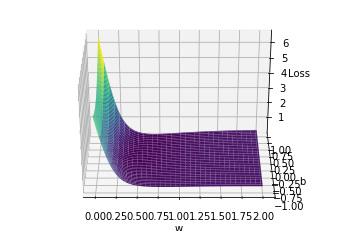

In [47]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW, BB, Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('Loss')

ax.view_init(30, 270)

In [0]:
ij = np.argmin(Loss)
i = int(np.floor(ij/Loss.shape[1]))
j = int(ij - i * Loss.shape[1])

In [49]:
print(i, j)

62 25


In [50]:
print(WW[i, j], BB[i, j])

0.5 0.24


# Class for Sigmoid Neuron

In [0]:
class SigmoidNeuron:
  
  def __init__(self):
    self.w = None
    self.b = None
    
  def perceptron(self, x):
    return np.dot(x, self.w.T) + self.b
  
  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))
  
  def grad_w(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred) * x
  
  def grad_b(self, x, y):
    y_pred = self.sigmoid(self.perceptron(x))
    return (y_pred - y) * y_pred * (1 - y_pred)
  
  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):
    
    # initialise w, b
    if initialise:
      self.w = np.random.randn(1, X.shape[1])
      self.b = 0
      
    if display_loss:
      loss = {}
    
    for i in tqdm_notebook(range(epochs), total=epochs, unit="epoch"):
      dw = 0
      db = 0
      for x, y in zip(X, Y):
        dw += self.grad_w(x, y)
        db += self.grad_b(x, y)       
      self.w -= learning_rate * dw
      self.b -= learning_rate * db
      
      if display_loss:
        Y_pred = self.sigmoid(self.perceptron(X))
        loss[i] = mean_squared_error(Y_pred, Y)
    
    if display_loss:
      plt.plot(loss.values())
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()
      
  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.sigmoid(self.perceptron(x))
      Y_pred.append(y_pred)
    return np.array(Y_pred)

# Fit for toy data

In [0]:
X = np.asarray([[2.5, 2.5], [4, -1], [1, -4], [-3, 1.25], [-2, -4], [1, 5]])
Y = [1, 1, 1, 0, 0, 0]

In [53]:
sn = SigmoidNeuron()
sn.fit(X, Y, 1, 0.25, True)

In [0]:
def plot_sn(X, Y, sn, ax):
  X1 = np.linspace(-10, 10, 100)
  X2 = np.linspace(-10, 10, 100)
  XX1, XX2 = np.meshgrid(X1, X2)
  YY = np.zeros(XX1.shape)
  for i in range(X2.size):
    for j in range(X1.size):
      val = np.asarray([X1[j], X2[i]])
      YY[i, j] = sn.sigmoid(sn.perceptron(val))
  ax.contourf(XX1, XX2, YY, cmap=my_cmap, alpha=0.6)
  ax.scatter(X[:,0], X[:,1],c=Y, cmap=my_cmap)
  ax.plot()


[[ 1.44090249 -1.23318745]] [0.0007925]



[[ 1.63927098 -0.94558099]] [-0.00036733]



[[ 1.80866091 -0.63353492]] [-0.064867]



[[ 1.84100728 -0.61832084]] [-0.10061414]



[[ 1.86280973 -0.62866153]] [-0.13394334]



[[ 1.88435821 -0.63523284]] [-0.16499947]



[[ 1.90458412 -0.64169443]] [-0.19408037]



[[ 1.92371381 -0.64779592]] [-0.2213915]



[[ 1.94185401 -0.65358162]] [-0.24711302]



[[ 1.95909985 -0.65908149]] [-0.2714005]



[[ 1.97553401 -0.66432159]] [-0.29438913]



[[ 1.99122866 -0.66932474]] [-0.31619688]



[[ 2.00624713 -0.67411102]] [-0.33692722]



[[ 2.02064523 -0.67869818]] [-0.35667129]



[[ 2.03447232 -0.68310196]] [-0.37550973]



[[ 2.04777231 -0.68733636]] [-0.39351412]



[[ 2.06058433 -0.69141391]] [-0.4107483]



[[ 2.07294343 -0.69534582]] [-0.42726937]



[[ 2.08488109 -0.6991422 ]] [-0.44312858]



[[ 2.09642569 -0.70281216]] [-0.45837212]



[[ 2.10760288 -0.70636393]] [-0.47304167]



[[ 2.11843594 -0.70980501]] [-0.48717502]



[[ 2.128946  -0.7131422]] [-0.5008065]



[[ 2.13915236 -0.71638172]] [-0.51396735]



[[ 2.14907265 -0.71952924]] [-0.52668614]



[[ 2.15872302 -0.72258999]] [-0.53898898]



[[ 2.16811831 -0.72556874]] [-0.55089984]



[[ 2.17727216 -0.72846991]] [-0.56244076]



[[ 2.18619716 -0.73129755]] [-0.57363203]



[[ 2.19490495 -0.73405543]] [-0.58449237]


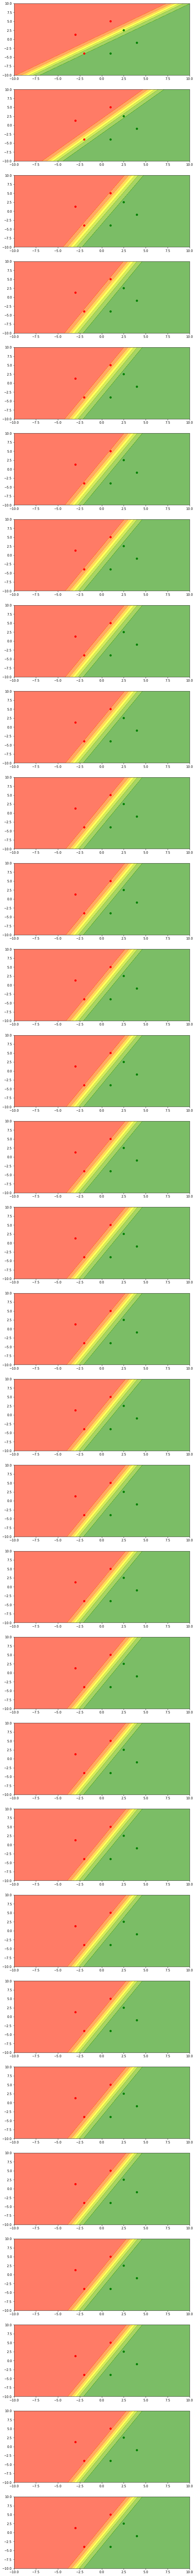

In [55]:
sn.fit(X, Y, 1, 0.05, True)
N = 30
plt.figure(figsize=(10, N*5))
for i in range(N):
  print(sn.w, sn.b)
  ax = plt.subplot(N, 1, i + 1)
  plot_sn(X, Y, sn, ax)
  sn.fit(X, Y, 1, 0.5, False)

# Load Data

In [56]:
!wget https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv

--2019-10-12 17:47:54--  https://www.dropbox.com/s/739uo8ebwbic9kb/mobile_cleaned.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.65.1, 2620:100:6021:1::a27d:4101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.65.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/739uo8ebwbic9kb/mobile_cleaned.csv [following]
--2019-10-12 17:47:55--  https://www.dropbox.com/s/raw/739uo8ebwbic9kb/mobile_cleaned.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 404 Not Found
2019-10-12 17:47:55 ERROR 404: Not Found.



In [57]:
!ls

mobile_cleaned.csv  sample_data


In [0]:
data = pd.read_csv('mobile_cleaned.csv')

In [59]:
data.head()

,Unnamed: 0,PhoneId,Screen to Body Ratio (calculated),Height,RAM,Processor_frequency,Pixel Density,Internal Memory,Screen Size,Weight,Capacity,Resolution,Sim1_2G,Sim1_3G,Sim1_4G,Num_cores_312,Num_cores_Deca,Num_cores_Dual,Num_cores_Hexa,Num_cores_Octa,Num_cores_Other,Num_cores_Quad,Num_cores_Tru-Octa,Brand_10.or,Brand_Apple,Brand_Asus,Brand_Billion,Brand_Blackberry,Brand_Comio,Brand_Coolpad,Brand_Do,Brand_Gionee,Brand_Google,Brand_HTC,Brand_Honor,Brand_Huawei,Brand_InFocus,Brand_Infinix,Brand_Intex,Brand_Itel,...,Brand_Micromax,Brand_Mobiistar,Brand_Moto,Brand_Motorola,Brand_Nokia,Brand_Nubia,Brand_OPPO,Brand_OnePlus,Brand_Oppo,Brand_Panasonic,Brand_Razer,Brand_Realme,Brand_Reliance,Brand_Samsung,Brand_Sony,Brand_Spice,Brand_Tecno,Brand_Ulefone,Brand_VOTO,Brand_Vivo,Brand_Xiaomi,Brand_Xiaomi Poco,Brand_Yu,Brand_iVooMi,"SIM Slot(s)_Dual SIM, GSM+CDMA","SIM Slot(s)_Dual SIM, GSM+GSM","SIM Slot(s)_Dual SIM, GSM+GSM, Dual VoLTE","SIM Slot(s)_Single SIM, GSM",os_name_Android,os_name_Blackberry,os_name_KAI,os_name_Nokia,os_name_Other,os_name_Tizen,os_name_iOS,SIM 2_2G,SIM 2_3G,SIM 2_4G,SIM 2_Other,Rating
0,0,0,80.68,157.9,4,1.8,403,64,6.26,182,4000,20,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.5
1,1,1,80.85,156.2,3,1.8,271,32,6.20,168,4230,8,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.5
2,2,2,83.68,157.0,3,2.1,409,32,6.30,168,3500,25,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.4
3,3,4,74.78,159.8,4,2.2,411,64,6.00,169,3300,24,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,4.3
4,4,5,84.23,160.4,4,2.2,396,64,6.50,175,3750,16,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,4.4


In [60]:
data.shape

(341, 89)

In [0]:
X = data.drop('Rating', axis=1)

In [0]:
Y = data['Rating'].values

In [63]:
Y

array([4.5, 4.5, 4.4, 4.3, 4.4, 4.5, 4.3, 4.1, 4.3, 4.5, 4.5, 4. , 4.4,
       4.4, 4.4, 4.4, 4.5, 4.4, 4.4, 4.4, 4.4, 4.5, 4.4, 4.3, 4.2, 4.3,
       4.3, 4.6, 4.4, 4.5, 3.9, 4.2, 4.3, 4.2, 4.3, 4.3, 4.2, 4.4, 4.1,
       3.8, 4.4, 4.6, 4.3, 4.5, 4.5, 4.2, 3.9, 4.3, 4. , 4.3, 4.3, 3.9,
       4.2, 4.5, 4. , 4.6, 4.2, 2.8, 4.4, 4.3, 4.2, 4.4, 4.4, 4. , 4.4,
       4.4, 4.1, 4.5, 4.3, 3.9, 4.3, 4.1, 4.1, 4.2, 3.4, 4.2, 4.6, 3.8,
       4.3, 4.5, 4.2, 4.5, 4.5, 4. , 4.1, 4.4, 4.5, 4.1, 4.5, 4.3, 4.5,
       3.9, 3.9, 4.4, 4.4, 4.4, 4. , 4.1, 4.1, 4.4, 4.3, 4.3, 4.2, 4.3,
       3.4, 4.3, 4.3, 4.2, 4.6, 4.8, 4.4, 3.4, 3.7, 4.2, 4.3, 4.4, 4.3,
       4.2, 4.1, 4.3, 4. , 3.9, 4.4, 4.4, 3.9, 3.1, 3.7, 4.2, 4.4, 4. ,
       4. , 4.1, 4.2, 4.3, 4.2, 4.3, 4.1, 3.6, 4.1, 4. , 3.8, 3.7, 4.3,
       4.1, 4.1, 4.5, 4. , 4.3, 3.6, 4.1, 4.5, 3.5, 4. , 4.3, 4.6, 3.5,
       3.9, 4.1, 3.9, 3.8, 4.4, 4.3, 4. , 3.9, 4.4, 4.7, 3.9, 4.5, 3.7,
       4. , 4.3, 4.1, 4.8, 4.1, 4. , 4.7, 4. , 4.1, 4. , 3.4, 4.

In [0]:
threshold = 4.2
data['Class'] = (data['Rating'] >= threshold).astype(np.int)

In [65]:
data['Class'].value_counts(normalize=True)

0    0.533724
1    0.466276
Name: Class, dtype: float64

In [0]:
Y_binarised = data['Class'].values

## Standardisation

In [0]:
R = np.random.random([100, 1])

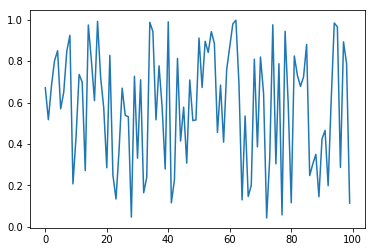

In [68]:
plt.plot(R)
plt.show()

In [69]:
np.mean(R)

0.5806463932213266

In [70]:
np.std(R)

0.28048299745287536

In [0]:
scaler = StandardScaler()

In [72]:
scaler.fit(R)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [73]:
scaler.mean_

array([0.58064639])

In [0]:
RT = scaler.transform(R)

In [75]:
np.mean(RT)

-4.063416270128073e-16

In [76]:
np.std(RT)

0.9999999999999999

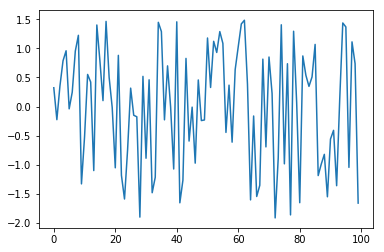

In [77]:
plt.plot(RT)
plt.show()

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0, stratify=Y_binarised)

In [79]:
print(X_train.shape, X_test.shape)

(255, 88) (86, 88)


In [0]:
scaler = StandardScaler()

In [0]:
X_scaled_train = scaler.fit_transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [0]:
minmax_scaler = MinMaxScaler()

In [0]:
Y_scaled_train = minmax_scaler.fit_transform(Y_train.reshape(-1, 1))

In [84]:
np.min(Y_scaled_train)

0.0

In [0]:
Y_scaled_test = minmax_scaler.transform(Y_test.reshape(-1, 1))

In [0]:
scaled_threshold = list(minmax_scaler.transform(np.array([threshold]).reshape(1, -1)))[0][0]

In [87]:
scaled_threshold

0.6800000000000002

In [0]:
Y_binarised_train = (Y_scaled_train > scaled_threshold).astype("int").ravel()

In [0]:
Y_binarised_test = (Y_scaled_test > scaled_threshold).astype("int").ravel()

# Train on Real Data

In [0]:
sn = SigmoidNeuron()

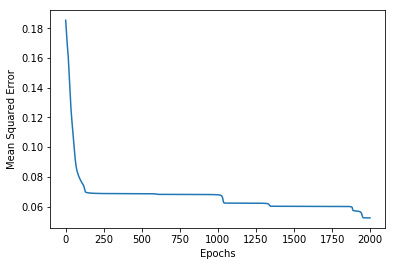

In [91]:
sn.fit(X_scaled_train, Y_scaled_train, epochs=2000, learning_rate=0.015, display_loss=True)

In [0]:
Y_pred_train = sn.predict(X_scaled_train)
Y_pred_test = sn.predict(X_scaled_test)

In [0]:
Y_pred_binarised_train = (Y_pred_train > scaled_threshold).astype("int").ravel()
Y_pred_binarised_test = (Y_pred_test > scaled_threshold).astype("int").ravel()

In [0]:
accuracy_train = accuracy_score(Y_pred_binarised_train, Y_binarised_train)
accuracy_test  = accuracy_score(Y_pred_binarised_test, Y_binarised_test)

In [95]:
print(accuracy_train, accuracy_test)

0.7803921568627451 0.8255813953488372
